## AIR QUALITY INDEX PREDICTION

In [2]:
#importing all libraries and dataset......
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv(r"C:\Users\Bhumika\Downloads\AirQualityUCI.csv")
df

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3/23/2005,4:00:00,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low


In [6]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [4]:
df.tail()


,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9352,3/23/2005,4:00:00,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low
9356,4/4/2005,4:00:00,-200.0,864,-200,0.8,478,52,1116,43,958,489,11.8,56.0,0.7743,Very low


In [7]:
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [8]:
#seeing the information of our dataset.....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
#number of rows and columns...
df.shape

(9357, 16)

In [11]:
#to see columns
df.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')

In [12]:
df.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [13]:
df['NMHC_GT'].value_counts()

NMHC_GT
-200    8443
 66       14
 29        9
 40        9
 93        8
        ... 
 206       1
 268       1
 320       1
 270       1
 10        1
Name: count, Length: 430, dtype: int64

In [18]:
df.drop('NMHC_GT',axis=1,inplace=True)

In [19]:
df.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'C6H6_GT', 'PT08_S2_NMHC',
       'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2', 'PT08_S5_O3', 'T',
       'RH', 'AH', 'CO_level'],
      dtype='object')

In [8]:
df.shape

(9357, 16)

In [47]:
df['CO_GT'].value_counts()

CO_GT
-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.2         1
 8.5         1
 7.6         1
 7.0         1
 11.9        1
Name: count, Length: 97, dtype: int64

In [33]:
df=df.replace(to_replace=-200,value=np.NaN)
df

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008.0,NaN,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918.0,NaN,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802.0,NaN,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982.0,NaN,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956.0,NaN,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3/23/2005,4:00:00,NaN,993.0,NaN,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,NaN,1122.0,NaN,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,NaN,883.0,NaN,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,NaN,818.0,NaN,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,Very low


In [54]:
df.isnull().sum()


Date               0
Time               0
CO_GT           1683
PT08_S1_CO       366
NMHC_GT         8443
C6H6_GT          366
PT08_S2_NMHC     366
Nox_GT          1639
PT08_S3_Nox      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
CO_level           0
dtype: int64

In [34]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008.0,NaN,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918.0,NaN,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802.0,NaN,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982.0,NaN,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956.0,NaN,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High


In [35]:
df.tail()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9352,3/23/2005,4:00:00,NaN,993.0,NaN,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,NaN,1122.0,NaN,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,NaN,883.0,NaN,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,NaN,818.0,NaN,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,Very low
9356,4/4/2005,4:00:00,NaN,864.0,NaN,0.8,478.0,52.0,1116.0,43.0,958.0,489.0,11.8,56.0,0.7743,Very low


In [38]:
df.mean
df

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008.0,NaN,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918.0,NaN,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802.0,NaN,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982.0,NaN,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956.0,NaN,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3/23/2005,4:00:00,NaN,993.0,NaN,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,NaN,1122.0,NaN,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,NaN,883.0,NaN,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,NaN,818.0,NaN,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,Very low


In [34]:
df=df.drop('NMHC_GT',axis='columns')
df

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3/23/2005,4:00:00,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,-200.0,1122,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,-200.0,883,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,-200.0,818,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low


In [35]:
df.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
dtype: int64

In [36]:
df.tail()

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
9352,3/23/2005,4:00:00,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,-200.0,1122,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,-200.0,883,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,-200.0,818,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low
9356,4/4/2005,4:00:00,-200.0,864,0.8,478,52,1116,43,958,489,11.8,56.0,0.7743,Very low


In [37]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [38]:
df['CO_level'].unique()

array(['Very High', 'High', 'Moderate', 'Low', 'Very low'], dtype=object)

In [39]:
df['CO_level'].value_counts()

CO_level
High         5801
Very low     1683
Low          1556
Moderate      305
Very High      12
Name: count, dtype: int64

C:\Users\Bhumika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CO_level', ylabel='Count'>

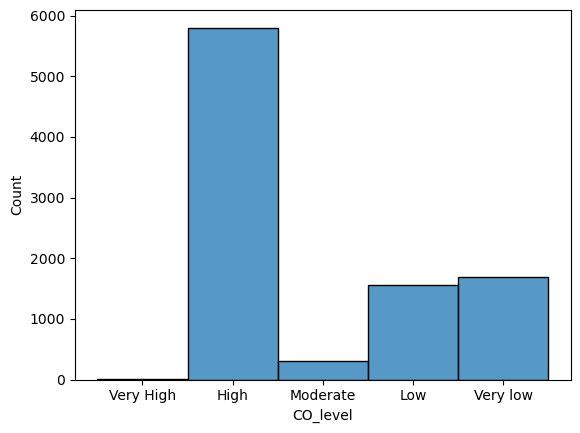

In [40]:
import seaborn as sns
sns.histplot(df['CO_level'])

In [41]:
df.nunique()

Date             391
Time              24
CO_GT             97
PT08_S1_CO      1042
C6H6_GT          408
PT08_S2_NMHC    1246
Nox_GT           926
PT08_S3_Nox     1222
NO2_GT           284
PT08_S4_NO2     1604
PT08_S5_O3      1744
T                437
RH               754
AH              6684
CO_level           5
dtype: int64

In [42]:
df['Time'].unique()

array(['19:00:00', '20:00:00', '18:00:00', '21:00:00', '17:00:00',
       '9:00:00', '14:00:00', '8:00:00', '16:00:00', '13:00:00',
       '10:00:00', '11:00:00', '15:00:00', '12:00:00', '0:00:00',
       '7:00:00', '1:00:00', '2:00:00', '23:00:00', '22:00:00', '3:00:00',
       '6:00:00', '5:00:00', '4:00:00'], dtype=object)

In [43]:
df[(df['Time']=='4:00:00')&(df['CO_level']=="High")]

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
2060,2/13/2005,4:00:00,2.8,1515,12.5,1066,345,508,140,1430,1548,8.9,81.3,0.9277,High
2518,2/2/2005,4:00:00,2.5,1058,4.8,753,210,764,121,986,1149,3.3,66.8,0.5215,High
2649,11/27/2004,4:00:00,2.4,1250,9.1,942,319,755,103,1323,1380,11.9,80.7,1.1199,High
2666,12/24/2004,4:00:00,2.4,1200,8.7,929,288,664,132,1082,1847,4.2,63.1,0.5259,High
3033,11/25/2004,4:00:00,2.2,1050,9.4,956,456,725,89,1162,1025,4.3,85.4,0.7152,High
3043,12/17/2004,4:00:00,2.2,-200,-200.0,-200,433,-200,119,-200,-200,-200.0,-200.0,-200.0000,High
3251,12/12/2004,4:00:00,2.1,1091,9.8,971,273,703,102,1148,1187,5.4,64.1,0.5772,High
3499,1/5/2005,4:00:00,2.0,1219,7.7,889,260,649,111,1186,1405,7.9,72.1,0.7679,High
3514,2/5/2005,4:00:00,2.0,1084,7.0,859,272,703,164,1017,1163,1.5,66.2,0.4571,High
3722,1/1/2005,4:00:00,1.9,1054,5.6,791,253,830,126,967,1131,4.3,55.3,0.4650,High


In [44]:
df[(df['Time']=='6:00:00')&(df['CO_level']=="High")]

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
1251,12/24/2004,6:00:00,3.5,1166,8.2,909,351,691,136,1079,1680,4.8,61.9,0.5370,High
2379,2/13/2005,6:00:00,2.6,1453,10.9,1012,324,534,150,1348,1441,8.3,84.0,0.9234,High
3064,2/2/2005,6:00:00,2.2,1069,4.5,737,257,792,125,946,1114,2.6,67.5,0.5034,High
3354,4/16/2004,6:00:00,2.0,1242,10.0,978,180,778,87,1686,1184,11.7,75.3,1.0325,High
3471,11/25/2004,6:00:00,2.0,1016,9.1,945,498,724,93,1147,1038,4.0,84.4,0.6943,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,12/14/2004,6:00:00,1.1,964,5.4,784,282,824,92,1080,959,6.0,77.3,0.7262,High
5748,2/1/2005,6:00:00,1.1,1024,4.2,724,241,814,122,944,1198,2.0,64.9,0.4661,High
5783,3/4/2005,6:00:00,1.1,1023,3.6,690,210,833,117,1049,1006,3.7,76.4,0.6164,High
5785,3/5/2005,6:00:00,1.1,993,4.3,727,194,810,128,989,1001,3.1,68.6,0.5302,High


<Axes: xlabel='CO_GT', ylabel='Time'>

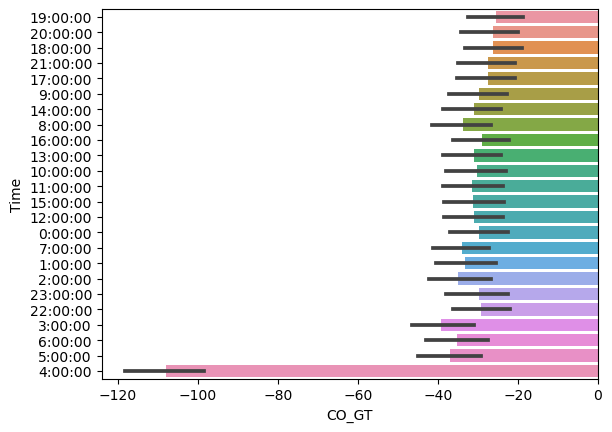

In [45]:
sns.barplot(x='CO_GT',y='Time',data=df)

<Axes: xlabel='PT08_S1_CO', ylabel='Time'>

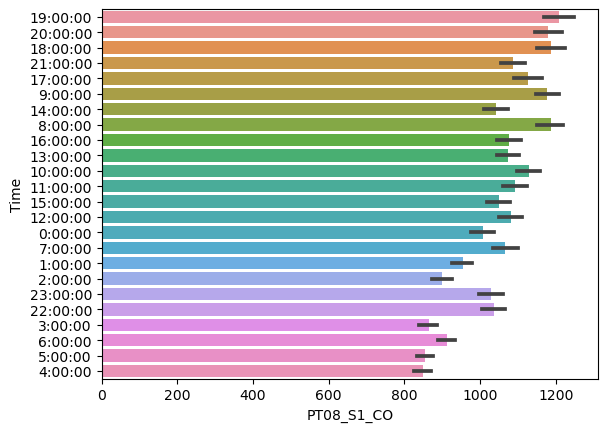

In [46]:
sns.barplot(x='PT08_S1_CO',y='Time',data=df)

<Axes: xlabel='CO_GT', ylabel='PT08_S1_CO'>

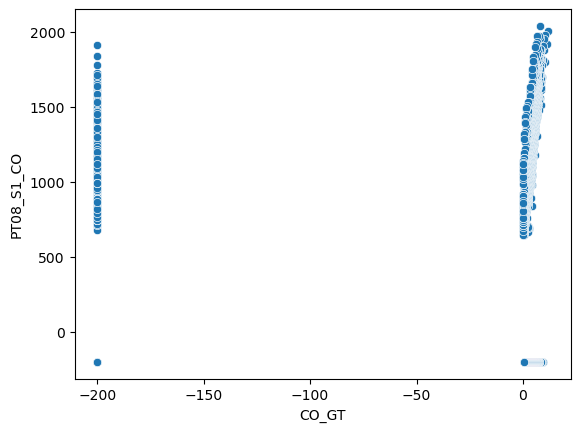

In [47]:
sns.scatterplot(x='CO_GT',y='PT08_S1_CO',data=df)

<Axes: xlabel='C6H6_GT', ylabel='PT08_S1_CO'>

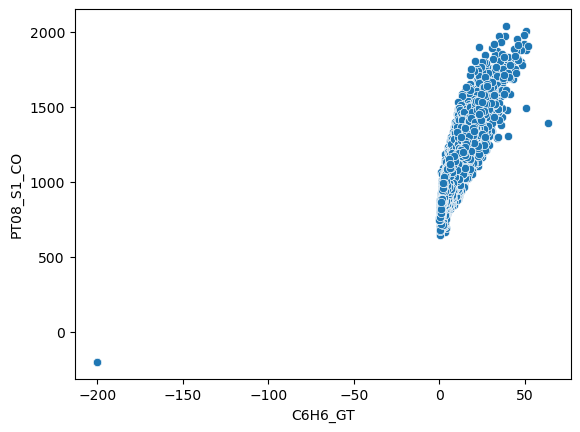

In [50]:
sns.scatterplot(x='C6H6_GT',y='PT08_S1_CO',data=df)

<Axes: xlabel='NO2_GT', ylabel='Nox_GT'>

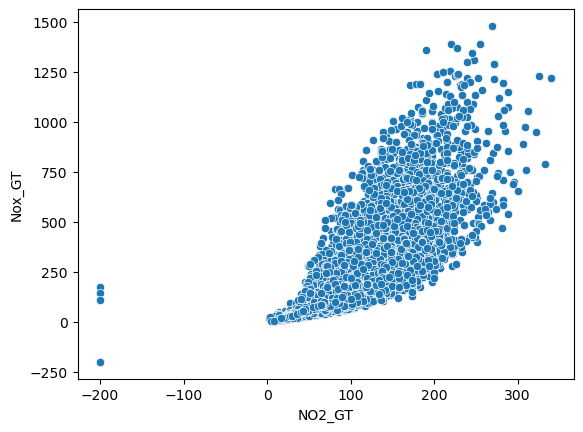

In [51]:
sns.scatterplot(x='NO2_GT',y='Nox_GT',data=df)

<Axes: xlabel='PT08_S4_NO2', ylabel='PT08_S5_O3'>

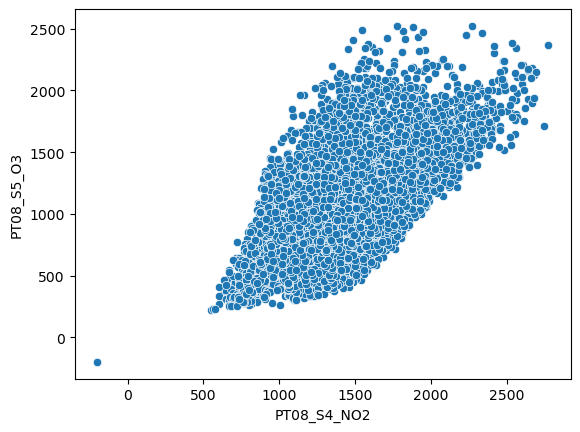

In [52]:
sns.scatterplot(x='PT08_S4_NO2',y='PT08_S5_O3',data=df)

C:\Users\Bhumika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

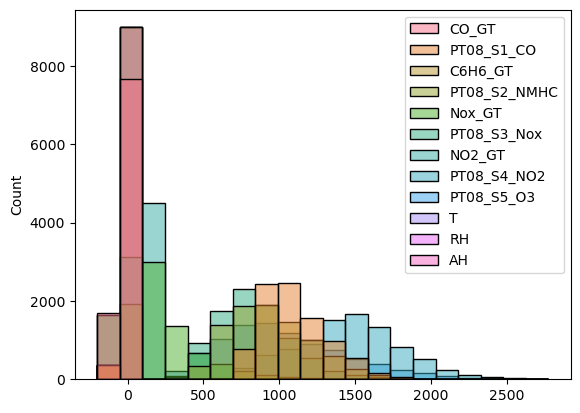

In [54]:
sns.histplot(bins=20,data=df)

In [62]:
df.replace([np.inf,-np.inf],np.nan)


,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3/23/2005,4:00:00,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,Very low
9353,3/26/2005,4:00:00,-200.0,1122,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,Very low
9354,3/29/2005,4:00:00,-200.0,883,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,Very low
9355,4/1/2005,4:00:00,-200.0,818,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,Very low


C:\Users\Bhumika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhumika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhumika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhumika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

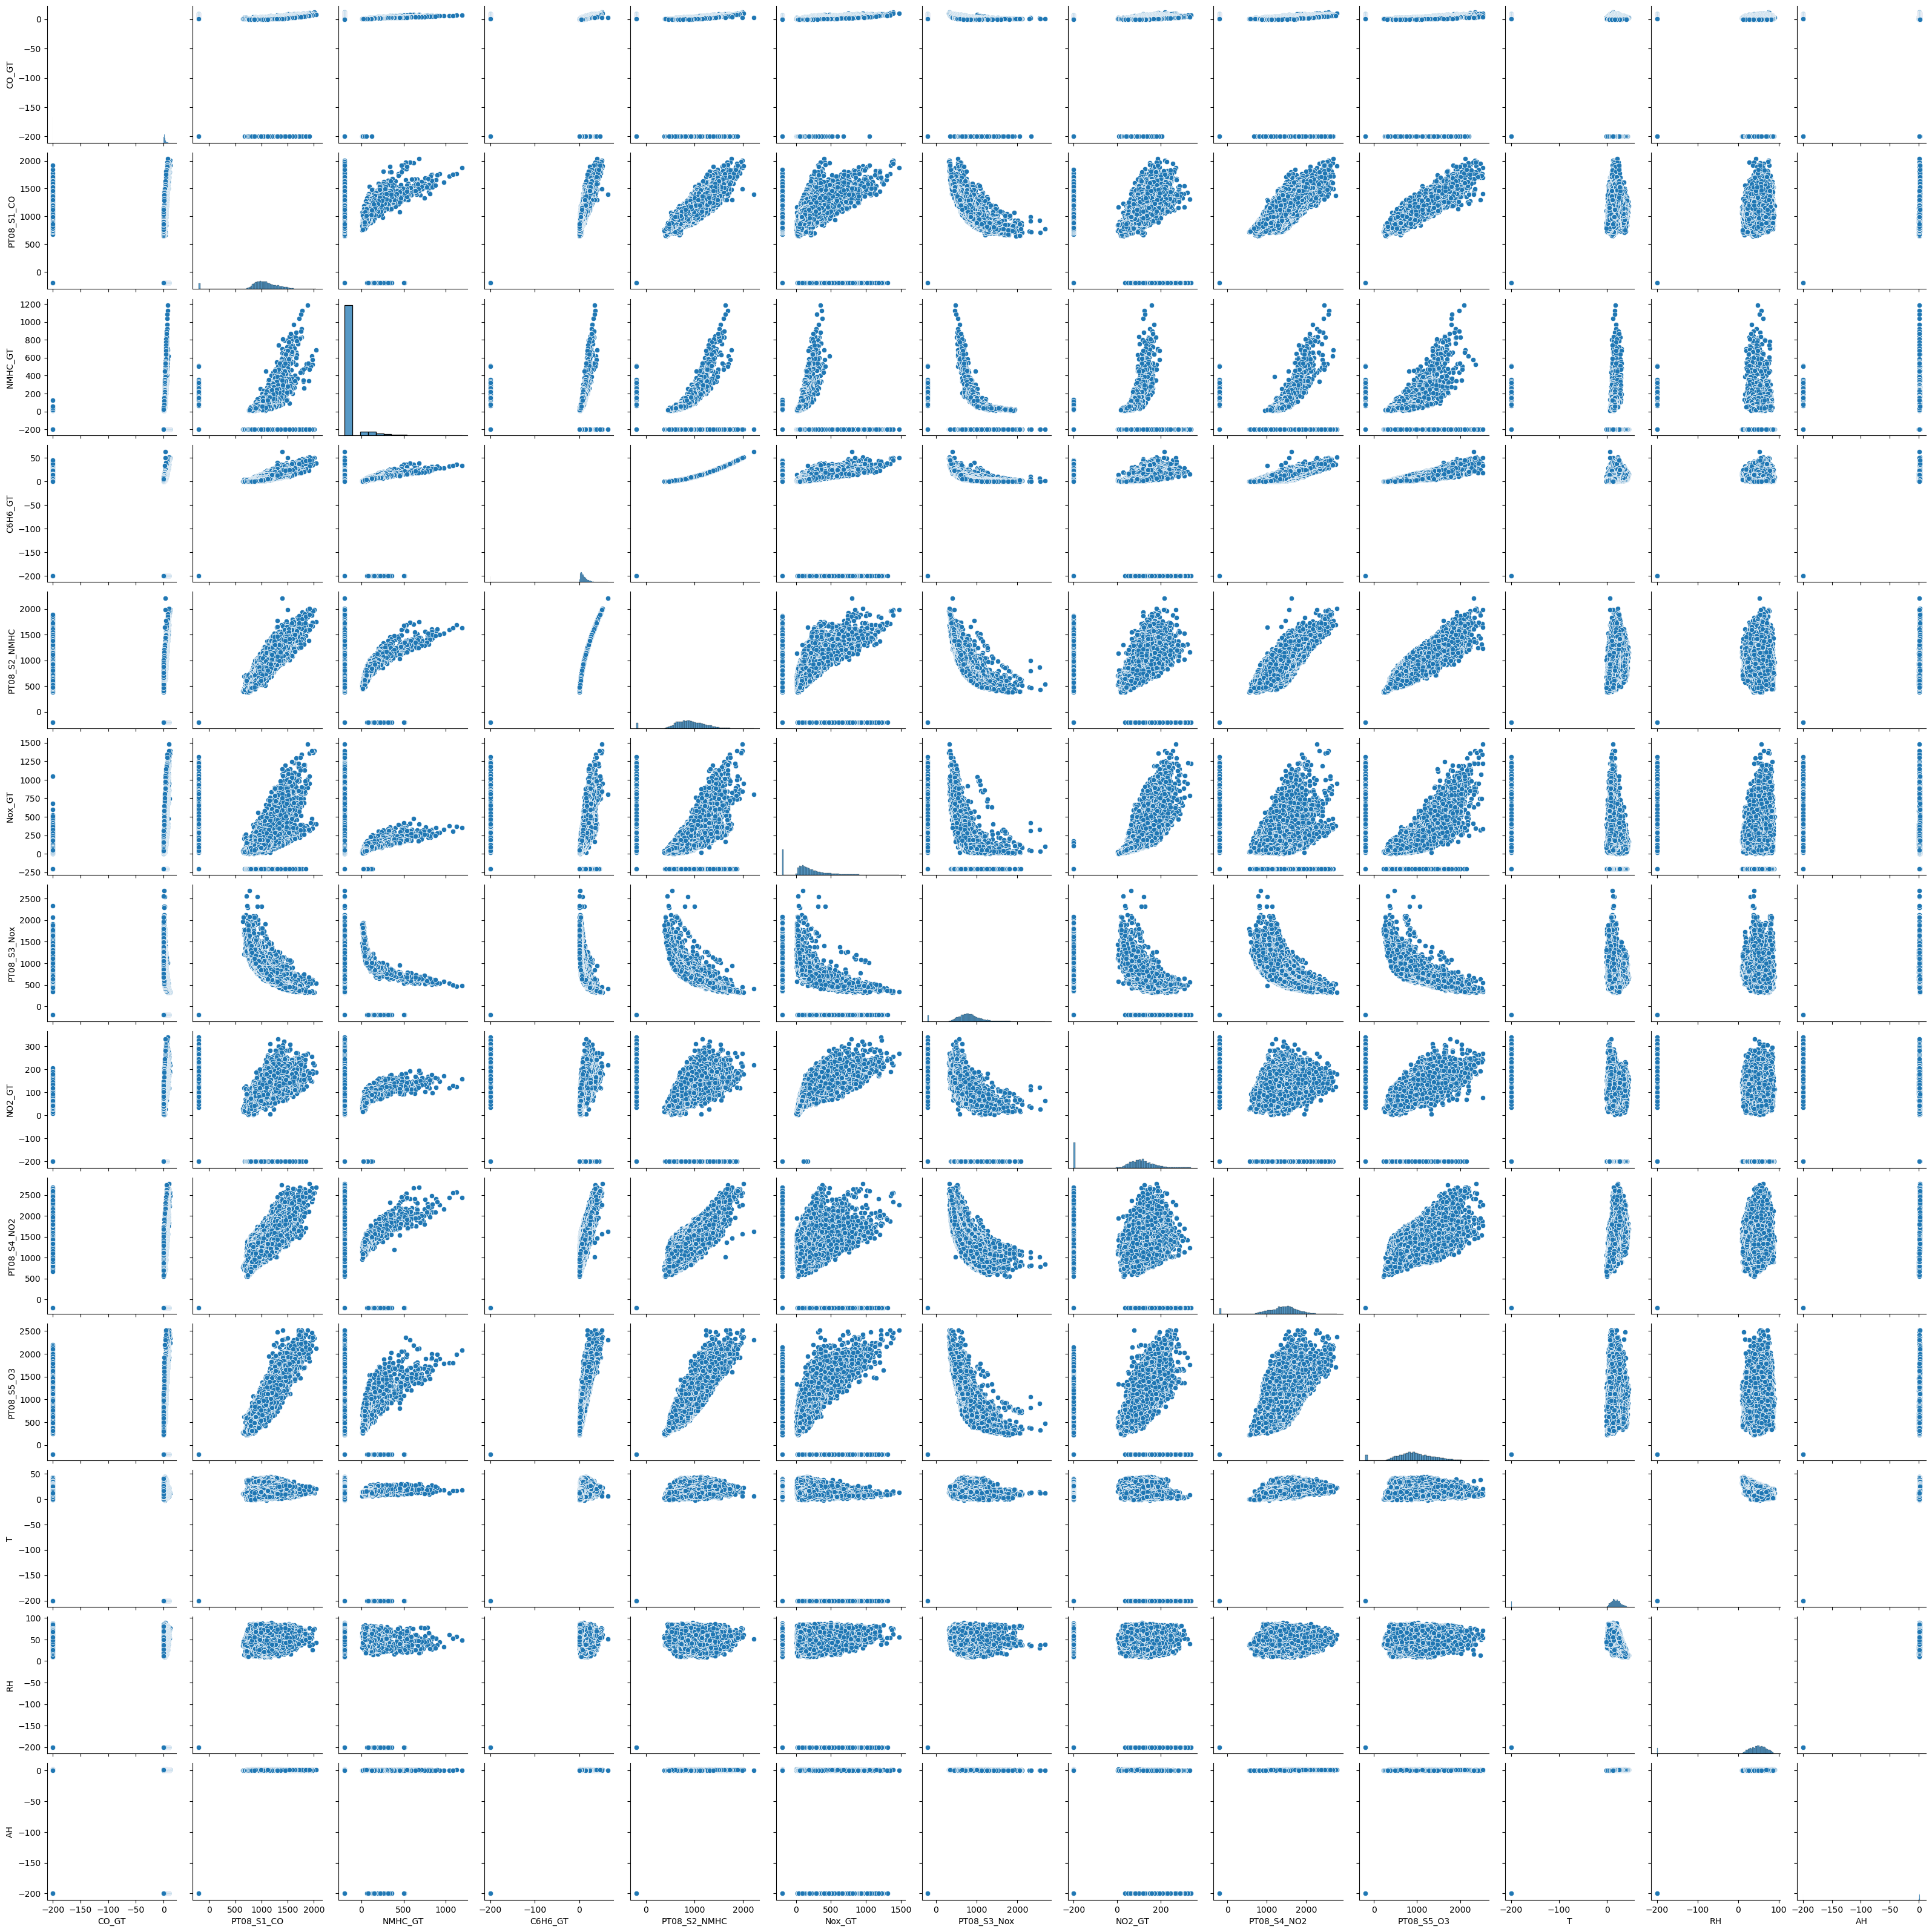

In [3]:
#visualisation of pairplots
sns.pairplot(df)
plt.show()

In [7]:
#Applying Encoding to few columns:- to convert categorial values of relevent features to numerical ones.........
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Time']=le.fit_transform(df['Time'])
df['Date']=le.fit_transform(df['Date'])
df['CO_level']=le.fit_transform(df['CO_level'])
print(df)

      Date  Time  CO_GT  PT08_S1_CO  NMHC_GT  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0       77    10   11.9        2008     -200     50.6          1980    1389   
1       77    12   11.5        1918     -200     49.4          1958    1358   
2       70     9   10.2        1802     -200     47.7          1924     748   
3       77     9   10.2        1982     -200     49.5          1959    1369   
4       80     9   10.1        1956     -200     45.2          1877    1389   
...    ...   ...    ...         ...      ...      ...           ...     ...   
9352   180    18 -200.0         993     -200      2.3           604      85   
9353   186    18 -200.0        1122     -200      6.0           811     181   
9354   192    18 -200.0         883     -200      1.3           530      63   
9355   205    18 -200.0         818     -200      0.8           473      47   
9356   232    18 -200.0         864     -200      0.8           478      52   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3 

In [8]:

df['CO_level'].unique()

array([3, 0, 2, 1, 4])

In [9]:
#here 3 denotes very high ,0 denotes high,2 denotes moderate ,1 denotes low,4 denotes very low......

In [10]:

#now to extract independent and dependent variables.....
x=df[['Date','Time','CO_GT','PT08_S1_CO','C6H6_GT','PT08_S2_NMHC','Nox_GT','PT08_S3_Nox','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']]
y=df['CO_level']

In [11]:
print(x)

      Date  Time  CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  Nox_GT  \
0       77    10   11.9        2008     50.6          1980    1389   
1       77    12   11.5        1918     49.4          1958    1358   
2       70     9   10.2        1802     47.7          1924     748   
3       77     9   10.2        1982     49.5          1959    1369   
4       80     9   10.1        1956     45.2          1877    1389   
...    ...   ...    ...         ...      ...           ...     ...   
9352   180    18 -200.0         993      2.3           604      85   
9353   186    18 -200.0        1122      6.0           811     181   
9354   192    18 -200.0         883      1.3           530      63   
9355   205    18 -200.0         818      0.8           473      47   
9356   232    18 -200.0         864      0.8           478      52   

      PT08_S3_Nox  NO2_GT  PT08_S4_NO2  PT08_S5_O3     T    RH      AH  
0             325     220         2562        2342  12.4  74.7  1.0741  
1            

In [100]:
print(y)

0       3
1       3
2       3
3       3
4       3
       ..
9352    4
9353    4
9354    4
9355    4
9356    4
Name: CO_level, Length: 9357, dtype: int64


In [40]:
#now split the data into training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [101]:
df

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,77,10,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,3
1,77,12,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,3
2,70,9,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,3
3,77,9,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,3
4,80,9,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,180,18,-200.0,993,-200,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919,4
9353,186,18,-200.0,1122,-200,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013,4
9354,192,18,-200.0,883,-200,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611,4
9355,205,18,-200.0,818,-200,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606,4


In [102]:
x

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,77,10,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741
1,77,12,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324
2,70,9,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244
3,77,9,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936
4,80,9,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919
9353,186,18,-200.0,1122,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013
9354,192,18,-200.0,883,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611
9355,205,18,-200.0,818,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606


In [103]:
y_test

2973    0
3396    0
4372    0
6025    2
7960    4
       ..
2417    0
5144    0
6749    1
7698    4
5809    0
Name: CO_level, Length: 2340, dtype: int64

<Axes: >

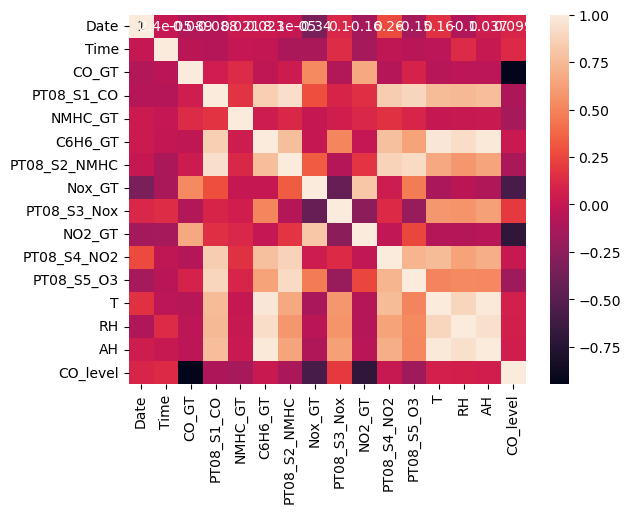

In [105]:
#CORRELATION IN HEATMAP........
sns.heatmap(df.corr(),annot=True)

## Applying Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Bhumika\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
lr_pred=lr.predict(x_test)
lr_pred

array([0, 0, 0, ..., 1, 4, 0], dtype=int64)

In [46]:
#To check the classification report......
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1467
           1       0.79      0.74      0.77       384
           2       0.00      0.00      0.00        70
           3       0.50      0.67      0.57         3
           4       1.00      1.00      1.00       416

    accuracy                           0.91      2340
   macro avg       0.64      0.67      0.65      2340
weighted avg       0.88      0.91      0.89      2340



C:\Users\Bhumika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhumika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhumika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
dt_pred=dt.predict(x_test)
dt_pred

array([0, 0, 0, ..., 1, 4, 0], dtype=int64)

In [61]:
#To check the classification report......
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       1.00      1.00      1.00       384
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00       416

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340



## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
rf_pred=rf.predict(x_test)
rf_pred

array([0, 0, 0, ..., 1, 4, 0], dtype=int64)

In [64]:
#To check the classification report......
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1467
           1       0.99      1.00      1.00       384
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00       416

    accuracy                           1.00      2340
   macro avg       1.00      0.99      1.00      2340
weighted avg       1.00      1.00      1.00      2340



In [67]:
#now compare the accuracies of these three  machine learning algorithims
from sklearn.metrics import accuracy_score
lr_acc=accuracy_score(y_test,lr_pred)
dt_acc=accuracy_score(y_test,dt_pred)
rf_acc=accuracy_score(y_test,rf_pred)
print("accuracy of logistic regression is:-",lr_acc)
print("accuracy of decision tree is:-",dt_acc)
print("accuracy of Random forest is:-",rf_acc)

accuracy of logistic regression is:- 0.905982905982906
accuracy of decision tree is:- 1.0
accuracy of Random forest is:- 0.9987179487179487


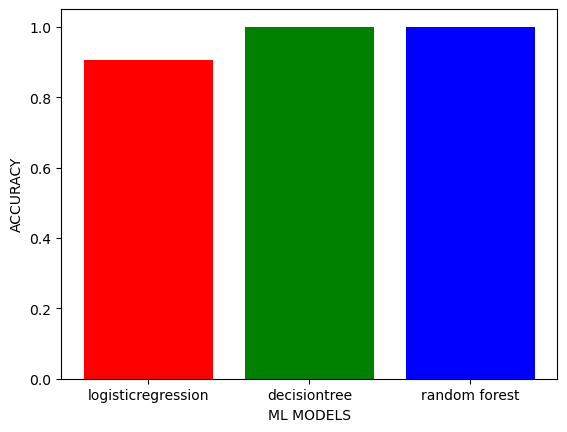

In [72]:
models=["logisticregression","decisiontree","random forest"]
accuracies=[lr_acc,dt_acc,rf_acc]
plt.bar(models,accuracies,color=['red','green','blue'])
plt.xlabel("ML MODELS")
plt.ylabel("ACCURACY")
plt.show()

In [80]:
#out of all three algorithims ,decisiontree works better with great accuracy......
x

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,77,10,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741
1,77,12,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324
2,70,9,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244
3,77,9,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936
4,80,9,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919
9353,186,18,-200.0,1122,6.0,811,181,641,92,1336,1122,16.2,71.2,1.3013
9354,192,18,-200.0,883,1.3,530,63,997,46,1102,617,13.7,68.2,1.0611
9355,205,18,-200.0,818,0.8,473,47,1257,41,898,323,13.7,48.8,0.7606


In [94]:
#prediction by decision tree....
predict=dt.predict([[180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919]])
predict

C:\Users\Bhumika\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [93]:
#prediction by Random Forest....
predict=rf.predict([[180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919]])
predict

C:\Users\Bhumika\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [92]:
#prediction by Logistic Regression....
predict=lr.predict([[180,18,-200.0,993,2.3,604,85,848,65,1160,762,14.5,66.4,1.0919]])
predict

C:\Users\Bhumika\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4], dtype=int64)